# Name: Sourabh Barala
# Course: M.Sc. Data Science
# Year: 1st
# Reg. No.: 23MSD7044
# Subject: Machine Learning and its Applications
#
#
#
#
#
#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

In [2]:
titanic=pd.read_csv('archive/tested.csv')

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


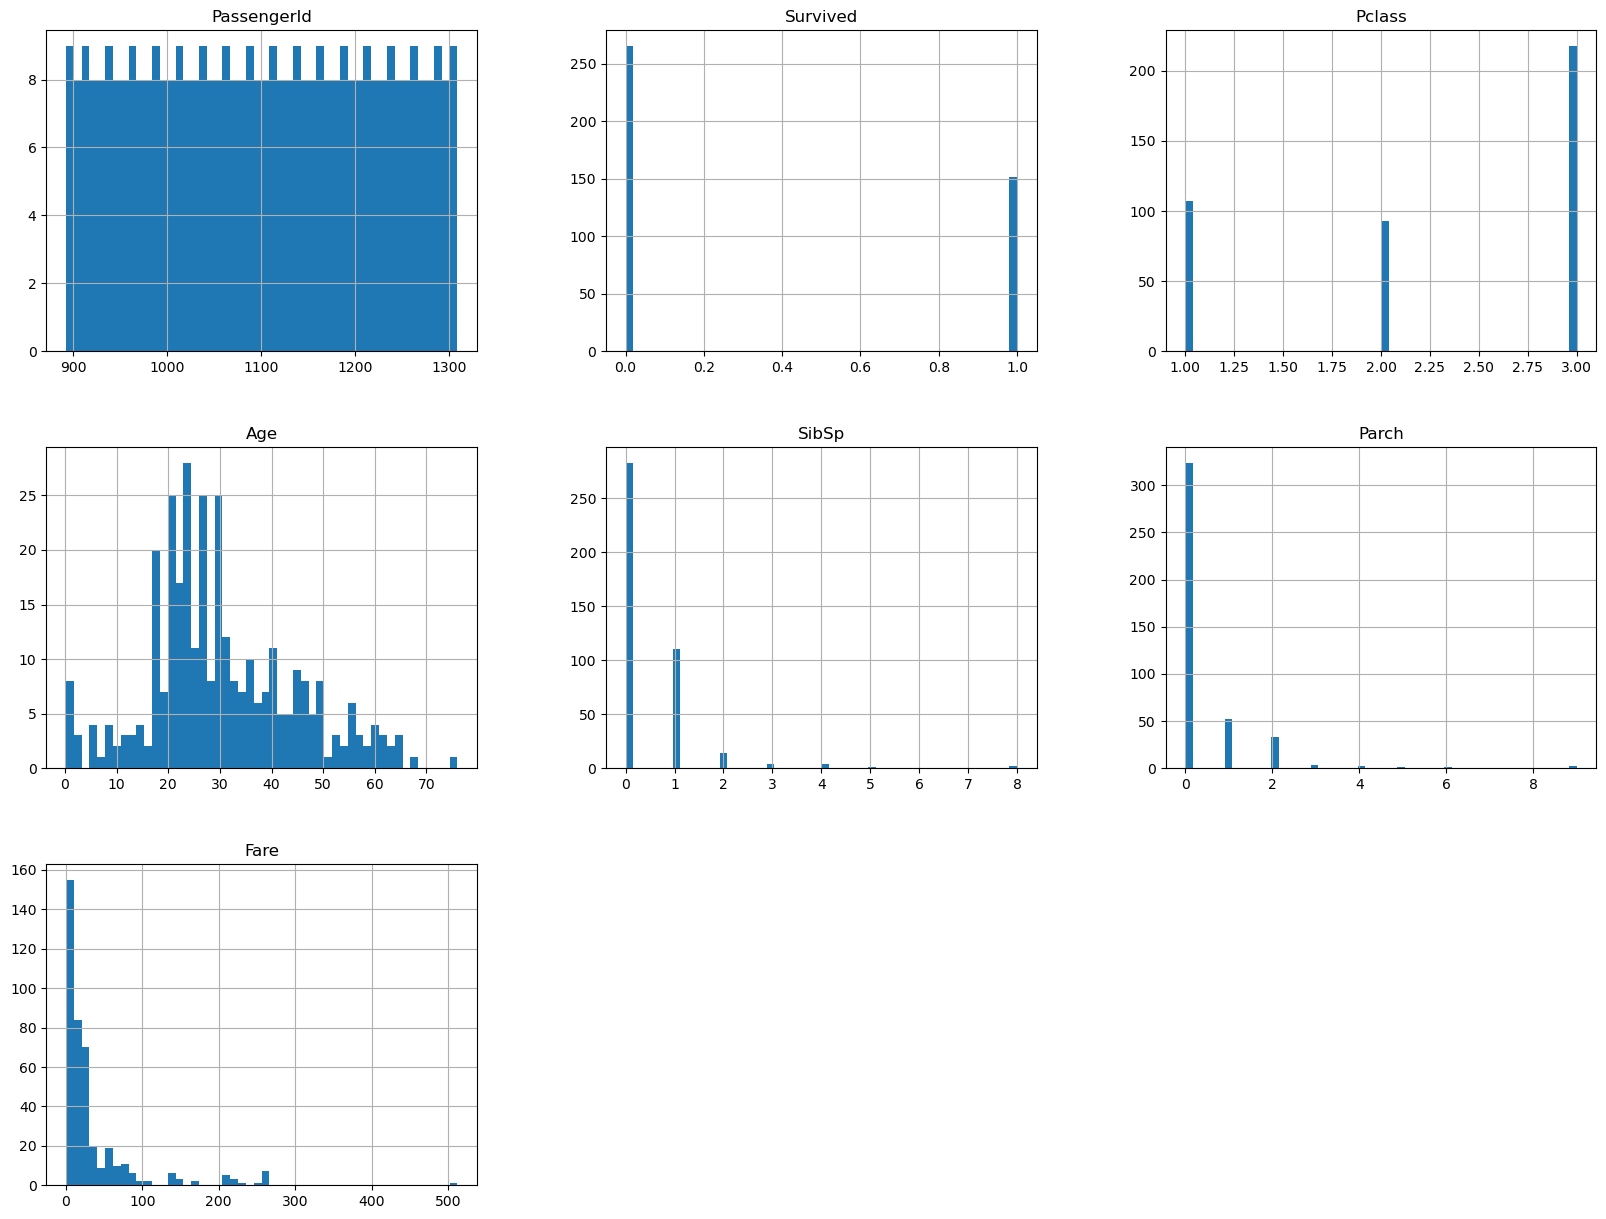

In [6]:
titanic.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
train_set,test_set=train_test_split(titanic,random_state=100,test_size=0.3,stratify=titanic['Survived'])

titanic=train_set.copy()

In [8]:
numeric_cols=['Survived','Pclass','Age','SibSp','Parch','Fare']

In [9]:
titanic[numeric_cols].corr()['Survived']

Survived    1.000000
Pclass     -0.108371
Age         0.054808
SibSp       0.052525
Parch       0.213548
Fare        0.204776
Name: Survived, dtype: float64

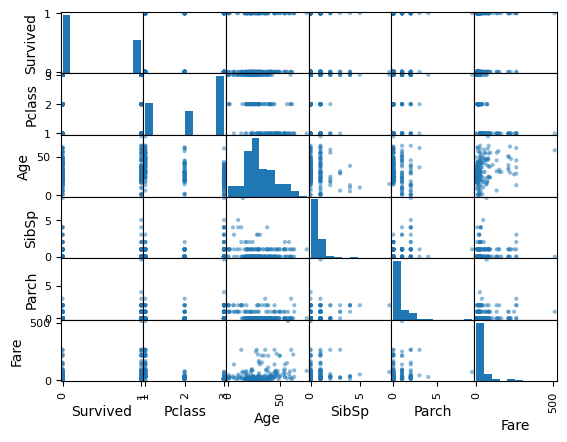

In [10]:
pd.plotting.scatter_matrix(titanic[numeric_cols])
plt.show()

In [11]:
labels,category=pd.factorize(titanic['Embarked'])
labels2,category2=pd.factorize(titanic['Sex'])
labels3,category3=pd.factorize(titanic['Cabin'])

In [12]:
titanic['embarked_num']=labels
titanic['Sex_num']=labels2
titanic['cabin_num']=labels3

In [13]:
numeric_cols.extend(['embarked_num','Sex_num','cabin_num'])


In [14]:
titanic[numeric_cols].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,embarked_num,Sex_num,cabin_num
Survived,1.000000,-0.108371,0.054808,0.052525,0.213548,0.204776,0.139645,1.000000,0.137130
Pclass,-0.108371,1.000000,-0.545526,0.028740,0.037316,-0.569527,0.043861,-0.108371,-0.604828
Age,0.054808,-0.545526,1.000000,-0.133935,-0.167283,0.308094,0.131046,0.054808,0.390074
SibSp,0.052525,0.028740,-0.133935,1.000000,0.356761,0.140274,-0.106346,0.052525,0.059850
Parch,0.213548,0.037316,-0.167283,0.356761,1.000000,0.191723,-0.108267,0.213548,0.086654
Fare,0.204776,-0.569527,0.308094,0.140274,0.191723,1.000000,0.055062,0.204776,0.583569
embarked_num,0.139645,0.043861,0.131046,-0.106346,-0.108267,0.055062,1.000000,0.139645,0.027665
Sex_num,1.000000,-0.108371,0.054808,0.052525,0.213548,0.204776,0.139645,1.000000,0.137130
cabin_num,0.137130,-0.604828,0.390074,0.059850,0.086654,0.583569,0.027665,0.137130,1.000000


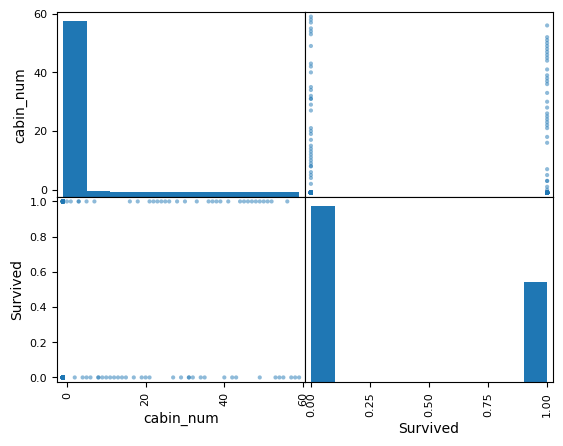

In [15]:
pd.plotting.scatter_matrix(titanic[['cabin_num','Survived']])
plt.show()

In [16]:
train_para=train_set.drop(['PassengerId','Name','Ticket','Survived','Cabin'],axis=1)  # parameters for training
train_label=train_set['Survived']             # labels for training


In [17]:
train_para.isnull().sum()

Pclass       0
Sex          0
Age         61
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [18]:
train_para.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 192 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    292 non-null    int64  
 1   Sex       292 non-null    object 
 2   Age       231 non-null    float64
 3   SibSp     292 non-null    int64  
 4   Parch     292 non-null    int64  
 5   Fare      291 non-null    float64
 6   Embarked  292 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 18.2+ KB


In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
class CleanNumericData(BaseEstimator, TransformerMixin):
    def __init__(self,method='median',fill_value=0):
        self.method=method
        self.fill_value=fill_value
        
    def give_numeric_cols(self,data):
        col_names=[data.columns[i] for i in range(len(data.dtypes)) if (data.dtypes[i]==int or data.dtypes[i]==float)]
        return col_names
    
    def fit(self,data):
        return self
    
    def transform(self,data):
        imputer=SimpleImputer(strategy=self.method)
        num_cols=self.give_numeric_cols(data)
        X=imputer.fit_transform(data[num_cols])
        X_df=pd.DataFrame(X,columns=num_cols,index=data.index)
        return X_df
    
    
def ApplyOneHotEncoding(data):
    cato_cols=['Sex','Embarked']
    cat_encoder=OneHotEncoder()
    encoded=cat_encoder.fit_transform(data[cato_cols])
    encoded_df=pd.DataFrame(encoded.toarray(),columns=['female','male','embarked_C','embarked_Q','embarked_S'],index=data.index)
    encoded_df=encoded_df.drop('male',axis=1)
    return encoded_df


num_pipline = Pipeline([
    ('cleaner',CleanNumericData()),
    ('standard_scaler',StandardScaler())
])

full_pipeline=ColumnTransformer([
    ('num',num_pipline,['Pclass','Age','SibSp','Parch','Fare']),
    ('cat',OneHotEncoder(),['Sex','Embarked']),
])

In [20]:
temp=train_para.copy()

In [21]:
temp2=full_pipeline.fit_transform(temp)

In [22]:
transformed_train_para=pd.DataFrame(temp2,columns=['Pclass','Age', 'SibSp', 'Parch', 'Fare','Female','Male','Embarked_c','Embarked_S','Embarked_q'],index=temp.index)

In [23]:
transformed_train_para

,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_c,Embarked_S,Embarked_q
192,0.890640,-1.444960,0.636853,0.748420,-0.384944,0.0,1.0,0.0,0.0,1.0
134,0.890640,1.023488,-0.476686,-0.426519,-0.494953,0.0,1.0,0.0,0.0,1.0
317,-0.275579,-0.857234,-0.476686,-0.426519,-0.451573,0.0,1.0,0.0,0.0,1.0
135,0.890640,-0.465417,-0.476686,-0.426519,-0.495646,0.0,1.0,0.0,0.0,1.0
72,0.890640,-0.073600,-0.476686,-0.426519,-0.494466,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
181,-1.441799,0.553308,0.636853,0.748420,0.758729,0.0,1.0,1.0,0.0,0.0
283,0.890640,-1.640869,0.636853,0.748420,-0.372520,1.0,0.0,1.0,0.0,0.0
390,-1.441799,-0.543780,-0.476686,-0.426519,0.930995,0.0,1.0,0.0,0.0,1.0
137,-0.275579,-0.308690,-0.476686,-0.426519,-0.409930,0.0,1.0,0.0,0.0,1.0


In [24]:
test_param=test_set.drop('Survived',axis=1)
test_labels=test_set['Survived']

In [25]:
temp=test_param.copy()

In [26]:
temp2=full_pipeline.fit_transform(temp)

In [27]:
transformed_test_para=pd.DataFrame(temp2,columns=['Pclass','Age', 'SibSp', 'Parch', 'Fare','Female','Male','Embarked_c','Embarked_S','Embarked_q'],index=temp.index)

In [28]:
transformed_test_para

,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_c,Embarked_S,Embarked_q
131,-1.67332,1.900885,-0.553748,-0.375548,-0.053824,0.0,1.0,1.0,0.0,0.0
45,0.83666,-0.348615,-0.553748,-0.375548,-0.521055,0.0,1.0,0.0,0.0,1.0
348,-0.41833,-0.428954,-0.553748,-0.375548,-0.394454,0.0,1.0,0.0,0.0,1.0
118,-1.67332,0.535117,-0.553748,-0.375548,1.007620,0.0,1.0,1.0,0.0,0.0
173,0.83666,-0.268276,-0.553748,-0.375548,-0.536856,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
364,-1.67332,-0.348615,0.571611,-0.375548,0.557987,1.0,0.0,1.0,0.0,0.0
322,-0.41833,-0.268276,-0.553748,-0.375548,-0.405808,0.0,1.0,0.0,0.0,1.0
1,0.83666,1.418849,0.571611,-0.375548,-0.542061,1.0,0.0,0.0,0.0,1.0
120,-0.41833,-1.393026,-0.553748,-0.375548,-0.343360,1.0,0.0,0.0,0.0,1.0


In [29]:
ds_tree=DecisionTreeClassifier(max_depth=1)
kfold=KFold(n_splits=5,random_state=100,shuffle=True)
score=cross_val_score(estimator=ds_tree,X=transformed_train_para,y=train_label,cv=kfold)

## Random Forest

In [30]:
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)

In [31]:
rnd_clf.fit(transformed_train_para,train_label)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [32]:
rnd_clf_pred=rnd_clf.predict(transformed_test_para)

## Bagging

In [33]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(splitter='random',max_leaf_nodes=16),n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1)

In [34]:
bag_clf.fit(transformed_train_para,train_label)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [35]:
bag_clf_pred=bag_clf.predict(transformed_test_para)

## AdaBoost

In [36]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm='SAMME.R',learning_rate=0.5)

In [37]:
ada_clf.fit(transformed_train_para,train_label)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [38]:
ada_clf_pred=ada_clf.predict(transformed_test_para)

## Gradient boosting

In [39]:
gb_clf=GradientBoostingClassifier(max_depth=2,n_estimators=3,learning_rate=1.0)

In [40]:
gb_clf.fit(transformed_train_para,train_label)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3)

In [41]:
gb_clf_pred=gb_clf.predict(transformed_test_para)

## XGBoost

In [42]:
xgb_model=xgb.XGBClassifier()

In [43]:
xgb_model.fit(transformed_train_para,train_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
xgb_pred=xgb_model.predict(transformed_test_para)
xgb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

## Blending

In [45]:
class blending_ensemble:
    def __init__(self,meta_model,models):
        self.meta_model=meta_model
        self.models=models
        self.data=None
        self.labels=None
        self.tst_size=None
        
        
    def get_meta_train_data(self):
        train_meta=[]
        from sklearn.model_selection import train_test_split
        train_para, val_para ,train_labels, val_labels=train_test_split(self.data,self.labels,test_size=self.tst_size,stratify=self.labels)
        for model in models:
            model.fit(train_para,train_labels)
            preds=model.predict(val_para)
            preds=preds.reshape(len(preds),1)
            train_meta.append(preds)
            
        train_meta=np.hstack(train_meta)
            
        return (train_meta,val_labels)
    
    def get_meta_test_data(self,predict_data):
        test_meta=[]
        for model in models:
            
            preds=model.predict(predict_data)
            preds=preds.reshape(len(preds),1)
            test_meta.append(preds)
        test_meta=np.hstack(test_meta)
        return test_meta
            
    def fit(self,train_data,train_labels,test_size):
        self.data=train_data
        self.labels=train_labels
        self.tst_size=test_size
        
        meta_train_data,meta_train_labels=self.get_meta_train_data()
        # print(meta_train_data)
        self.meta_model.fit(meta_train_data,meta_train_labels)
        
    def predict(self,predict_data):
        
        meta_test_data=self.get_meta_test_data(predict_data)
        # print(meta_test_data)
        return self.meta_model.predict(meta_test_data)
        

In [46]:
models=[DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),SVC(probability=True),GaussianNB()]

bl_en=blending_ensemble(meta_model=LogisticRegression(),models=models)

In [47]:
bl_en.fit(transformed_train_para,train_label,test_size=0.3)

In [48]:
bl_pred=bl_en.predict(transformed_test_para)

## Stacking

In [49]:
class stacking_ensemble:
    def __init__(self,models,meta_model):
        self.data=None
        self.models=models
        self.meta_model=meta_model
        self.labels=None
        self.number_of_folds=None
        
        
    def get_folds(self):
        start=0
        fold_size=len(self.data)//self.number_of_folds
        folds=[]
        for j in range(self.number_of_folds):
            if j==(self.number_of_folds-1):
                # print(start,start+fold_size)
                hold_out=self.data[start:]
                hold_out_labels=self.labels[start:]
                
                train_on=self.data[:start]
                train_on_labels=self.labels[:start]
                
            else:
                
                hold_out=self.data[start:(start+fold_size)]
                hold_out_labels=self.labels[start:(start+fold_size)]
                
                train_on=np.concatenate(( self.data[:start] , self.data[(start+fold_size):] ) ,axis=0)
                train_on_labels=np.concatenate(( self.labels[:start] , self.labels[(start+fold_size):] ), axis=0)
                
            start+=fold_size
        
            folds.append((train_on,train_on_labels,hold_out,hold_out_labels))
            
        return folds
        
    def get_meta_train_data(self):
        train_meta=[]
        
        folds=self.get_folds()
        train_meta_labels=np.array([])
        
#         getting labels for validation set, this will be used in stacking_ensemble class
        for i in folds:
            train_meta_labels=np.concatenate((train_meta_labels,i[3]),axis=0)
            
        
#         multiple models
        if type(self.models)==list:
            
            for model in models:
                
                pred=np.array([])
                pred=pred.reshape(len(pred),1)
                
                for i in folds:
#                     train base model
                    model.fit(i[0],i[1])
#                     predict for validation set
                    curr_pred=model.predict(i[2])
    
                    curr_pred=curr_pred.reshape(len(curr_pred),1)
                    pred=np.concatenate((pred,curr_pred),axis=0)
            
                train_meta.append(pred)
            train_meta=np.hstack(train_meta)
            
#         single model
        else:
            print('y')
            pred=np.array([])
            pred=pred.reshape(len(pred),1)
            for i in folds:
                self.models.fit(i[0],i[1])
                curr_pred=self.models.predict(i[2])
                curr_pred=curr_pred.reshape(len(curr_pred),1)
                pred=np.concatenate((pred,curr_pred),axis=0)
            train_meta.append(pred)
            
            
        return (train_meta,train_meta_labels)
                    
                    
    def get_meta_test_data(self,predict_data):
        test_meta=[]
        

        if type(self.models)==list:
            
            pred=np.array([])
            pred=pred.reshape(len(pred),1)
            
            for model in models:
                
                curr_pred=model.predict(predict_data)
                curr_pred=curr_pred.reshape(len(curr_pred),1)
                
                test_meta.append(curr_pred)
                
            test_meta=np.hstack(test_meta)
            
        # single model
        else:
            
            pred=np.array([])
            pred=pred.reshape(len(pred),1)
            curr_pred=models.predict(predict_data)
            curr_pred=curr_pred.reshape(len(curr_pred),1)
                
            test_meta.append(curr_pred)
            
            
        return test_meta

        
    def fit(self,data,labels,number_of_folds=5):
        
        self.data=np.array(data)
        self.labels=np.array(labels)
        self.number_of_folds=number_of_folds
        meta_train_data,meta_train_labels=self.get_meta_train_data()
        # print(meta_train_data)
        self.meta_model.fit(meta_train_data,meta_train_labels)
        
    def predict(self,predict_data):
        # temp=kfold(data=predict_data, labels=labels, models=base_layer_models, number_of_folds=number_of_folds)
        predict_data=np.array(predict_data)
        meta_test_data=self.get_meta_test_data(predict_data)
        # print(meta_test_data)
        return self.meta_model.predict(meta_test_data)

In [50]:
models=[DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),SVC(probability=True),GaussianNB()]
stk=stacking_ensemble(meta_model=LogisticRegression(),models=models)

In [51]:
stk.fit(data=transformed_train_para,labels=train_label,number_of_folds=10)

In [52]:
stk_pred=stk.predict(transformed_test_para)

In [53]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

## Accuracy

In [54]:
print(f'bagging: {accuracy_score(y_true=test_labels, y_pred=bag_clf_pred)}')
print(f'gradient boosting: {accuracy_score(y_true=test_labels, y_pred=gb_clf_pred)}')
print(f'AdaBoosting: {accuracy_score(y_true=test_labels, y_pred=ada_clf_pred)}')
print(f'xgboosting: {accuracy_score(y_true=test_labels, y_pred=xgb_pred)}')
print(f'blending: {accuracy_score(y_true=test_labels, y_pred=bl_pred)}')
print(f'stacking: {accuracy_score(y_true=test_labels, y_pred=stk_pred)}')

bagging: 1.0
gradient boosting: 1.0
AdaBoosting: 1.0
xgboosting: 1.0
blending: 1.0
stacking: 1.0


## precision

In [55]:
print(f'bagging: {precision_score(y_true=test_labels, y_pred=bag_clf_pred)}')
print(f'gradient boosting: {precision_score(y_true=test_labels, y_pred=gb_clf_pred)}')
print(f'AdaBoosting: {precision_score(y_true=test_labels, y_pred=ada_clf_pred)}')
print(f'xgboosting: {precision_score(y_true=test_labels, y_pred=xgb_pred)}')
print(f'blending: {precision_score(y_true=test_labels, y_pred=bl_pred)}')
print(f'stacking: {precision_score(y_true=test_labels, y_pred=stk_pred)}')

bagging: 1.0
gradient boosting: 1.0
AdaBoosting: 1.0
xgboosting: 1.0
blending: 1.0
stacking: 1.0


## Recall

In [56]:
print(f'bagging: {recall_score(y_true=test_labels, y_pred=bag_clf_pred)}')
print(f'gradient boosting: {recall_score(y_true=test_labels, y_pred=gb_clf_pred)}')
print(f'AdaBoosting: {recall_score(y_true=test_labels, y_pred=ada_clf_pred)}')
print(f'xgboosting: {recall_score(y_true=test_labels, y_pred=xgb_pred)}')
print(f'blending: {recall_score(y_true=test_labels, y_pred=bl_pred)}')
print(f'stacking: {recall_score(y_true=test_labels, y_pred=stk_pred)}')

bagging: 1.0
gradient boosting: 1.0
AdaBoosting: 1.0
xgboosting: 1.0
blending: 1.0
stacking: 1.0


# F1

In [57]:
print(f'bagging: {f1_score(y_true=test_labels, y_pred=bag_clf_pred)}')
print(f'gradient boosting: {f1_score(y_true=test_labels, y_pred=gb_clf_pred)}')
print(f'AdaBoosting: {f1_score(y_true=test_labels, y_pred=ada_clf_pred)}')
print(f'xgboosting: {f1_score(y_true=test_labels, y_pred=xgb_pred)}')
print(f'blending: {f1_score(y_true=test_labels, y_pred=bl_pred)}')
print(f'stacking: {f1_score(y_true=test_labels, y_pred=stk_pred)}')

bagging: 1.0
gradient boosting: 1.0
AdaBoosting: 1.0
xgboosting: 1.0
blending: 1.0
stacking: 1.0


## Kfold Cross Validation

In [62]:
scores=cross_val_score(rnd_clf,transformed_train_para,train_label,
                      scoring='neg_mean_squared_error',cv=5)
scores=np.sqrt(-scores)

In [63]:
scores

array([0., 0., 0., 0., 0.])

## Hold-out validation

In [69]:
from sklearn.metrics import mean_squared_error

In [65]:
X_train, X_test, y_train, y_test=train_test_split(transformed_train_para,train_label,test_size=0.3)

In [67]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [68]:
pred=rnd_clf.predict(X_test)

In [70]:
mean_squared_error(y_true=y_test,y_pred=pred)

0.0